In [1]:
from LinClass import LinClass
from LinRegg import LinRegg
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import expit

In [2]:
heartData = np.loadtxt('cleanedSAheart.data.txt', skiprows=1)[:, 1:]
arrayY = heartData[:,-1]
y = np.zeros((len(heartData), 2))
for ii in range(len(heartData)):
    if arrayY[ii] == 1:
        y[ii] = np.array([1, 0])
    elif arrayY[ii] == 0:
        y[ii] = np.array([0, 1])
    else:
        print('something wrong')
        print(ii)
        print(y[ii])
X = heartData[:,0:-1]
Xtrain, Xtest = X[:int(len(heartData)/3)], X[int(len(heartData)/3):]
ytrain, ytest = y[:int(len(heartData)/3)], y[int(len(heartData)/3):]

In [3]:
heartClass = LinClass(Xtrain, ytrain, indicatorArray = ['no heart attack', 'heart attack'])

In [4]:
logisticFit = heartClass.binaryLogisticRegg()
XtestStandardized = heartClass.standardizeTest(Xtest)
print(logisticFit)
correct = 0
total = 0
for ii in range(len(XtestStandardized)):
    x = XtestStandardized[ii]
    probability = 1 - expit(-np.dot(x, logisticFit))
    if probability > 1/2:
        result = np.array([1, 0])
    else:
        result = np.array([0, 1])
    if (result == ytest[ii]).all():
        correct+=1 
    total +=1
print(correct/total)
        

[-0.71628593  0.03820115  0.4713396   0.32391317  0.38254948  0.23071592
  0.31111879 -0.39174642 -0.01906143  0.53281624]
0.7142857142857143


[-0.71628593  0.03820115  0.4713396   0.32391317  0.38254948  0.23071592
  0.31111879 -0.39174642 -0.01906143  0.53281624]
0
(220, 308)
0.7142857142857143
[-6.50589933e-01  2.33439649e-02  4.31181241e-01  3.02113403e-01
  1.89668478e-01  2.01654623e-01  2.59092675e-01 -2.06788953e-01
  2.21609798e-07  5.57559827e-01]
1
(222, 308)
0.7207792207792207
[-5.93372339e-01  1.16414463e-02  3.98355660e-01  2.80271794e-01
  3.01585916e-02  1.74965261e-01  2.12811988e-01 -5.42049374e-02
  2.00678845e-07  5.80901098e-01]
2
(220, 308)
0.7142857142857143
[-5.43481886e-01  2.12728965e-03  3.73258418e-01  2.49217385e-01
  1.16545968e-02  1.45663848e-01  1.75133233e-01 -1.12765187e-02
  2.05310138e-07  5.51273478e-01]
3
(222, 308)
0.7207792207792207
[-4.97392230e-01  8.24527202e-04  3.48797793e-01  2.22620828e-01
  3.80417984e-03  1.19300969e-01  1.39966441e-01 -5.00581719e-07
  1.66970337e-08  5.23593574e-01]
4
(223, 308)
0.724025974025974
[-4.51275180e-01  4.93499500e-03  3.22940340e-01  1.89630391e-

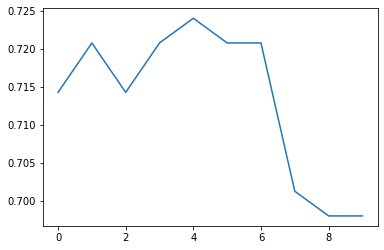

In [11]:
XtestStandardized = heartClass.standardizeTest(Xtest)
graphingX = np.arange(0, 10, 1)
graphingY = np.zeros(10)
for ii in range(len(graphingX)):
    bestFit = heartClass.binaryLogisticReggLasso(complexity=graphingX[ii])
    print(bestFit)
    correct = 0
    total = 0
    print(ii)
    for jj in range(len(XtestStandardized)):
        x = XtestStandardized[jj]
        probability = 1 - expit(-np.dot(x, bestFit))
        if probability > 1/2:
            result = np.array([1, 0])
        else:
            result = np.array([0, 1])
        if (result == ytest[jj]).all():
            correct+=1
        total +=1
    print((correct, total))
    print(correct/total)
    graphingY[ii] = correct/total
plt.plot(graphingX, graphingY)

In [6]:
heartClass.setProbabilities()
heartClass.setMeans()
heartClass.setLinearCovariance()
correct = 0
total = 0
for ii in range(len(Xtest)):
    x = Xtest[ii]
    guess = heartClass.optimizedLDASolve(x)
    index = np.nonzero(ytest[ii])[0][0]
    answer = heartClass.indicators[index]
    if (guess == answer):
        correct+=1
    total +=1
print(correct/total)

0.6655844155844156


In [7]:
correct = 0
total = 0
for ii in range(len(Xtest)):
    x = Xtest[ii]
    guess = heartClass.QDASolve(x)
    index = np.nonzero(ytest[ii])[0][0]
    answer = heartClass.indicators[index]
    if (guess == answer):
        correct+=1
    total +=1
print(correct/total)

0.6948051948051948


In [8]:
heartRegg = LinRegg(Xtrain, ytrain)
heartRegg.standardizePredictor()
heartRegg.RSSSolve()
bestFit = heartRegg.bestFit
XtestReggStandardized = heartRegg.standardizeTest(Xtest)
correct = 0
total = 0
for ii in range(len(XtestReggStandardized)):
    x = XtestReggStandardized[ii]
    guess = heartClass.determineClassRegg(x, bestFit)
    index = np.nonzero(ytest[ii])[0][0]
    answer = heartClass.indicators[index]
    if (guess == answer):
        correct+=1
    total +=1
print(correct/total)

0.7272727272727273


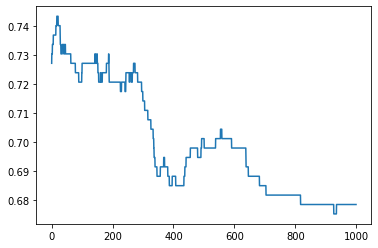

In [9]:
graphingX = np.arange(0, 1000, 0.5)
graphingY = np.zeros(2000)
XtestReggStandardized = heartRegg.standardizeTest(Xtest)
for ii in range(len(graphingX)):
    heartRegg.RSSRidgeSolve(complexity=graphingX[ii])
    bestFit = heartRegg.ridgeBestFit
    correct = 0
    total = 0
    for jj in range(len(XtestReggStandardized)):
        x = XtestReggStandardized[jj]
        guess = heartClass.determineClassRegg(x, bestFit)
        index = np.nonzero(ytest[jj])[0][0]
        answer = heartClass.indicators[index]
        if (guess == answer):
            correct+=1
        total +=1
    graphingY[ii] = correct/total
plt.plot(graphingX, graphingY)

In [10]:
print(np.amax(graphingY))
print(np.argmax(graphingY)*1/2)

0.7435064935064936
17.0
